In [3]:
from pixell import enmap, enplot, powspec, curvedsky
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from orphics import maps

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
camb_file = "/home/dwhan89/scratch/data/sehgal_et_al_sims/theoryCls/bode_almost_wmap5_lmax_1e4_lensedCls.dat"
#lmaps = enmap.read_fits("/home/dwhan89/workspace/cosmikyu/output/slensed_full_00000.fits")
lmaps = enmap.read_fits("/home/dwhan89/workspace/cosmikyu/output/slensed_00000.fits")

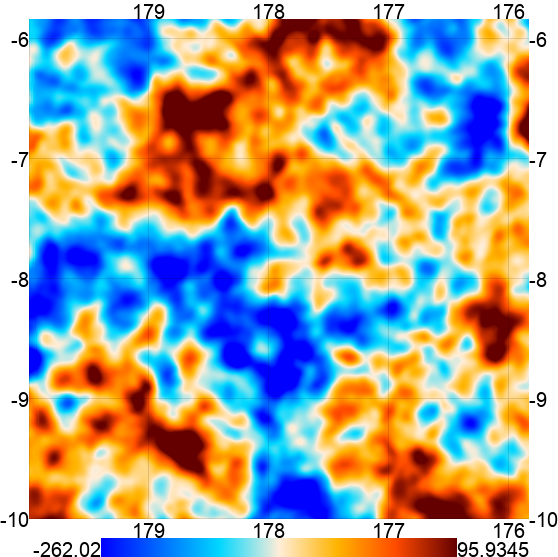

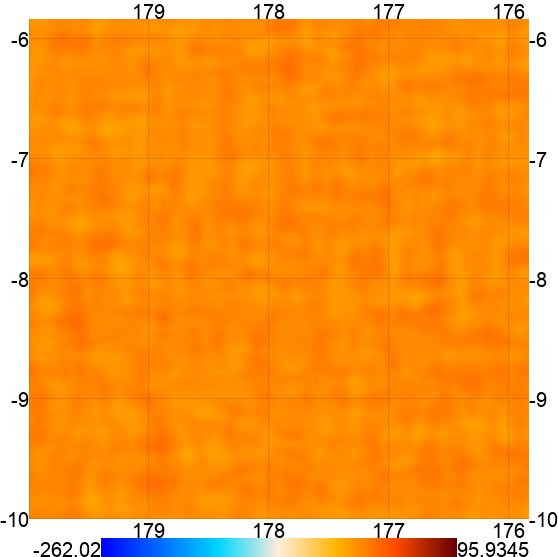

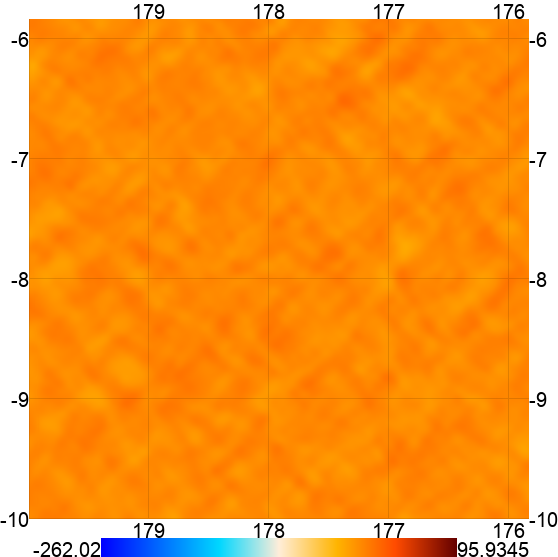

In [5]:
for i in range(3:)
enplot.pshow(lmaps[:,:500,:500], colorbar=True)

In [ ]:
for i, cmb_idx in enumerate(["T", "Q", "U"]):
    #mean = np.mean(lmaps[i])
    rms = np.sqrt(np.mean((lmaps[i])**2))
    
    print(f"R.M.S lensed sim {cmb_idx} map: {rms} uK")
    

In [89]:
curvedsky.alm2map_healpix??

In [91]:
for i, cmb_idx in enumerate(["T", "Q", "U"]):
    alm = curvedsky.map2alm(lmaps[i], lmax=10000)
    hpmap = curvedsky.alm2map_healpix(alm, nside=8192)
    rms = np.sqrt(np.mean(hpmap**2))
    
    print(f"R.M.S lensed sim {cmb_idx} map: {rms} uK")
    

R.M.S lensed sim T map: 111.11707621884283 uK
R.M.S lensed sim Q map: 4.492598940790758 uK
R.M.S lensed sim U map: 4.488628175606183 uK


In [92]:
cls = powspec.read_spectrum(camb_file)

for i, cmb_idx in enumerate(["T", "E", "B"]):
    rms = np.sqrt(np.mean(np.sum(cls[i,i])))*2*np.pi
    print(f"R.M.S lensed theo {cmb_idx} map: {rms} uK")

R.M.S lensed theo T map: 370.41555810577864 uK
R.M.S lensed theo E map: 4.798655068571222 uK
R.M.S lensed theo B map: 0.24941463415076992 uK


In [98]:
sshape, swcs = maps.rect_geometry(width_deg=20)
randmap = enmap.rand_gauss(sshape, swcs)

In [104]:
np.sum(lmaps[0]**2)/(4*np.pi)

917042467050.276

In [106]:
alm = curvedsky.map2alm(lmaps[0], lmax=10000)
hpmap = curvedsky.alm2map_healpix(alm, nside=8192)

AttributeError: 'numpy.ndarray' object has no attribute 'pixsizemap'

In [109]:
np.sum(cls[0,0])/(np.sum(hpmap**2)/(4*np.pi))

4.392439841403286e-09

In [105]:
l = np.arange(cls.shape[-1])
l_fact = 2*l+1

plt.plot(cls[0])

3475.5112796534977

In [84]:
np.sum((lmaps[0]-np.mean(lmaps[0]))**2)

array(1.15215074e+13)

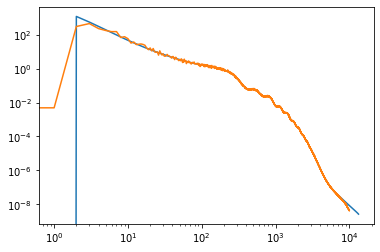

In [50]:
alm = curvedsky.map2alm(lmaps[0], lmax=10000)
cl_sim = hp.alm2cl(alm)
plt.plot(cls[0,0])
plt.plot(cl_sim)
plt.xscale("log")
plt.xlim()
plt.yscale("log")

38948.856243306065